In [27]:
import math

import numpy as np
import csv
X = []
Y = []
with open('faithful.csv', newline='') as csvfile:
    reader = csv.reader(csvfile, delimiter=',', quotechar='|')
    next(reader)
    for row in reader:
        X.append(float(row[0]))
        Y.append(float(row[1]))

In [28]:
muX = sum(X)/len(X)
muY = sum(Y)/len(Y)
sigmaX = math.sqrt(sum([pow(muX - x,2) for x in X])/(len(X)-1))
sigmaY = math.sqrt(sum([pow(muY - y,2) for y in Y])/(len(Y)-1))

In [29]:
transX = [(x-muX)/sigmaX for x in X]
transY = [(y-muY)/sigmaY for y in Y]

newx1,newx2,newy1,newy2 = 1, -1, -1, 1
    
x1,x2,y1,y2 = [], [], [], []
for i in range(len(X)):
    dist1 = pow(transX[i]-newx1,2) + pow(transY[i]-newy1,2)
    dist2 = pow(transX[i]-newx2,2) + pow(transY[i]-newy2,2)
    if(dist1<dist2):
        x1.append(transX[i])
        y1.append(transY[i])
    else:
        x2.append(transX[i])
        y2.append(transY[i])

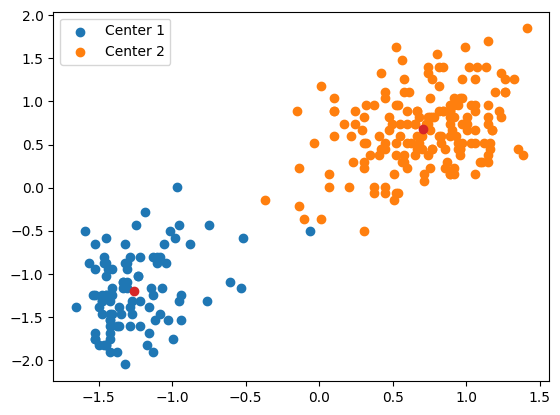

2


In [39]:
prevx1,prevx2,prevy1,prevy2 = 0, 0, 0, 0
count = 1
while(prevx1!=newx1 or prevx2!=newx2 or prevy1!=newy1 or prevy2!=newy2):
    count+=1
    prevx1 = newx1
    prevx2 = newx2
    prevy1 = newy1
    prevy2 = newy2
    newx1 = sum(x1)/len(x1)
    newx2 = sum(x2)/len(x2)
    newy1 = sum(y1)/len(y1)
    newy2 = sum(y2)/len(y2)
    x1.clear()
    x2.clear()
    y1.clear()
    y2.clear()
    for i in range(len(X)):
        dist1 = pow(transX[i]-newx1,2) + pow(transY[i]-newy1,2)
        dist2 = pow(transX[i]-newx2,2) + pow(transY[i]-newy2,2)
        if(dist1<dist2):
            x1.append(transX[i])
            y1.append(transY[i])
        else:
            x2.append(transX[i])
            y2.append(transY[i])
    
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
plt.scatter(x1,y1, color='C0', label='Center 1')
plt.scatter(x2,y2, color='C1', label='Center 2')
plt.scatter([newx1,newx2],[newy1,newy2], color="C3")
ax.legend()
ax.axis('auto')
plt.show()
print(count)